In [1]:
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.models import Model

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.utils.data_utils import get_file

from keras.applications.vgg16 import VGG16

from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.utils.vis_utils import plot_model

input_size = (224, 224, 3)

In [2]:
def build_vgg16_model(input_size=(224, 224, 3)):
  input_layer = Input(input_size)

  layer_1 = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_size)(input_layer)
  layer_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(layer_1)
  layer_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(layer_1)

  layer_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(layer_1)
  layer_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(layer_2)
  layer_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(layer_2)

  layer_3 = Conv2D(256, (3, 3), activation='relu', padding='same')(layer_2)
  layer_3 = Conv2D(256, (3, 3), activation='relu', padding='same')(layer_3)
  layer_3 = Conv2D(256, (3, 3), activation='relu', padding='same')(layer_3)
  layer_3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(layer_3)

  layer_4 = Conv2D(512, (3, 3), activation='relu', padding='same')(layer_3)
  layer_4 = Conv2D(512, (3, 3), activation='relu', padding='same')(layer_4)
  layer_4 = Conv2D(512, (3, 3), activation='relu', padding='same')(layer_4)
  layer_4 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(layer_4)

  layer_5 = Conv2D(512, (3, 3), activation='relu', padding='same')(layer_4)
  layer_5 = Conv2D(512, (3, 3), activation='relu', padding='same')(layer_5)
  layer_5 = Conv2D(512, (3, 3), activation='relu', padding='same')(layer_5)
  layer_5 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(layer_5)
  layer_5 = Flatten()(layer_5)

  dense_layer = Dense(4096, activation='relu')(layer_5)
  dense_layer = Dense(4096, activation='relu')(dense_layer)
  dense_layer = Dense(1000, activation='softmax')(dense_layer)

  model = Model(inputs=input_layer, outputs=dense_layer, name='VGG16')
  return model


## Transfer Learning (TL)

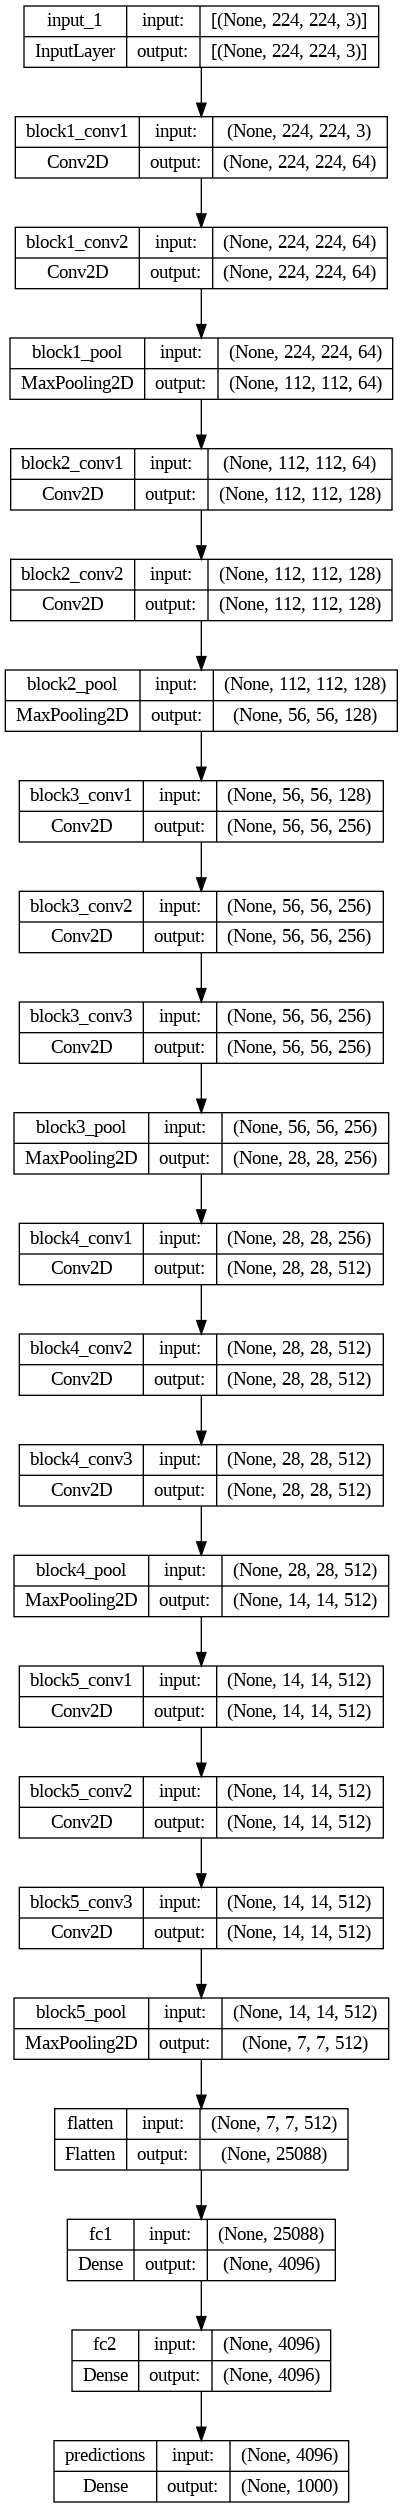

In [3]:
# model_vgg16 = build_vgg16_model()
model_vgg16 = VGG16(weights="imagenet")
plot_model(model_vgg16, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Model Inference

1/1 [==============================] - 1s 1s/step


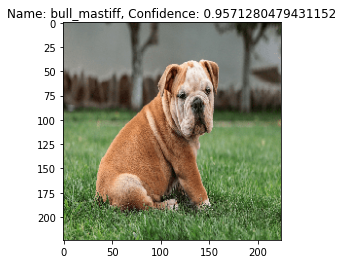

In [4]:
def predict_image(model, image_path: str):
    img_predict = image.load_img(image_path, target_size=(input_size[0], input_size[1]))

    plt.imshow(img_predict)

    img_predict = image.img_to_array(img_predict)
    img_predict = np.expand_dims(img_predict, axis=0)

    output_predict = model.predict(preprocess_input(img_predict))
    output_class_predict = decode_predictions(output_predict)[0][0]
    output_probs_predict = output_class_predict[2]
    output_class_predict = output_class_predict[1]
    plt.title(f"Name: {output_class_predict}, Confidence: {output_probs_predict}")

predict_image(model_vgg16, '/content/bulldog.png')